###### The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's load the dataset.

df_absent = pd.read_csv('Absenteeism_at_work.csv', sep=";")
df_absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
# let's check the shape of the dataset..

df_absent.shape

(740, 21)

The dataset has 740 rows and 21 attributes including the target variable.

In [4]:
# let's  check  the data typw of each attribute in the dataset.

df_absent.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

The whole  dataset is of 'int64' except for the 'Work load Average/day' which i of 'float64' data  type.

In [5]:
# Replacing the space to "_" in each column name/head.

df_absent.columns = df_absent.columns.str.replace(" ","_")
print(df_absent.columns)

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


In [6]:
# Number of Unique values present in each variable

df_absent.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average/day_             38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

#### CHECKING THE NULL VALUES

In [7]:
df_absent.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

It is clear with the above, that there are no null values present in the datset.

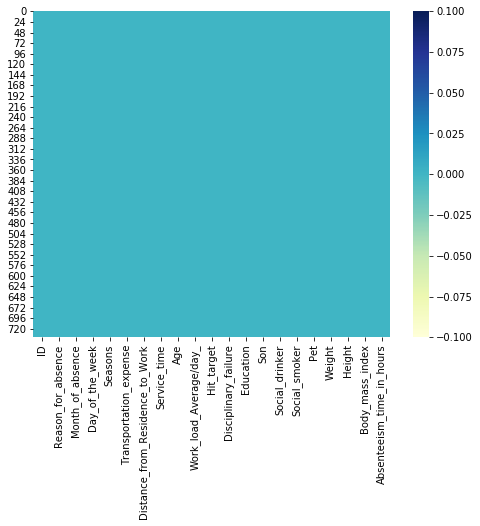

In [8]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(8,6))
sns.heatmap(data = df_absent.isnull(), cmap='YlGnBu')

#### STATISTICAL SUMMARY

In [9]:
df_absent.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


The range varies among the columns as some columns ranges from 0-4, 0-12 and some columns having high range as 39-378.
The more the rangethe more data is widely spread and the flatten curve.

#### CORRELATION

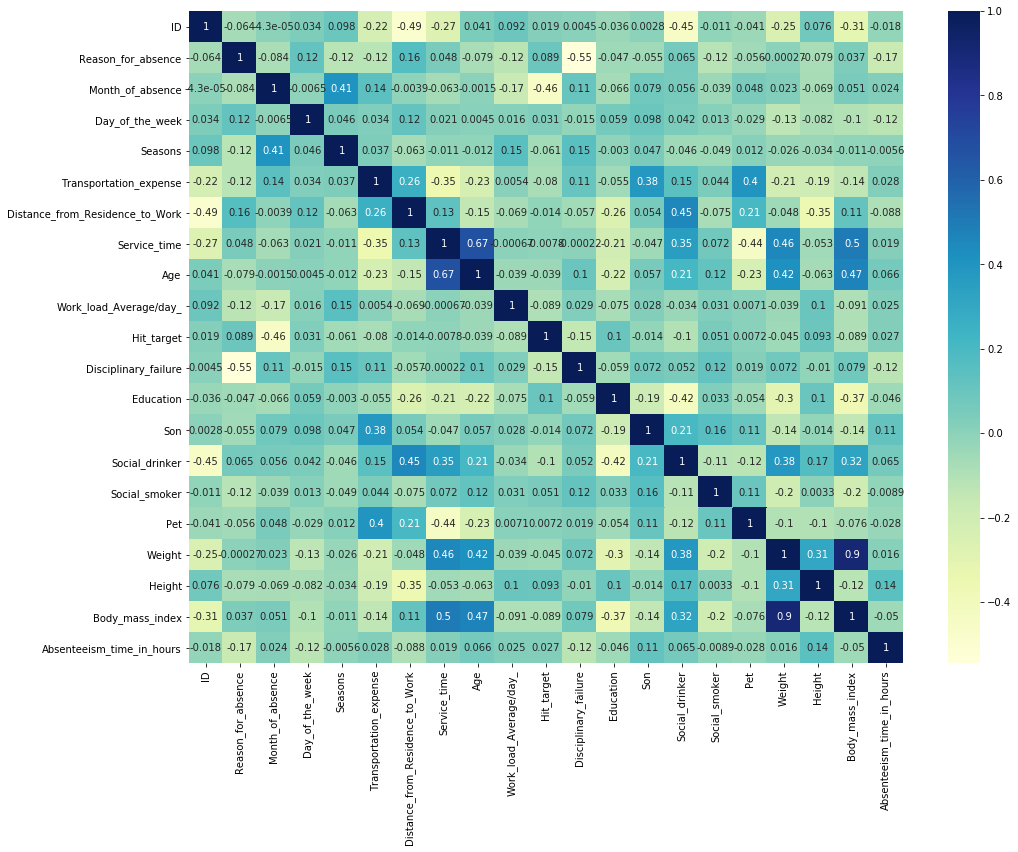

In [10]:
# Let's check the correlation among attributes using heatmap.

plt.figure(figsize=(16,12))
sns.heatmap(df_absent.corr(), cmap='YlGnBu', annot=True)

OBSERVATIONS :
    1. 'Weight' and 'Body_mass_index' have the strongest positive correlation in the dataset.
    2. 'Disciplinary_failure' is the strongest negatively correlated attibute in the dataset with 'Reason_for_absence' followed by 'Distance_from_Residence_to_Work' wirh 'ID'.

#### UNIVARIATE ANALYSIS

Visulaizing the distribution of each column.

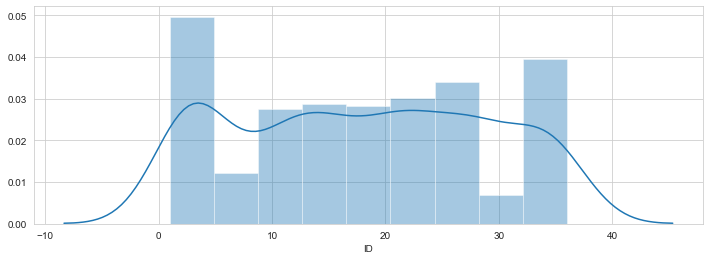

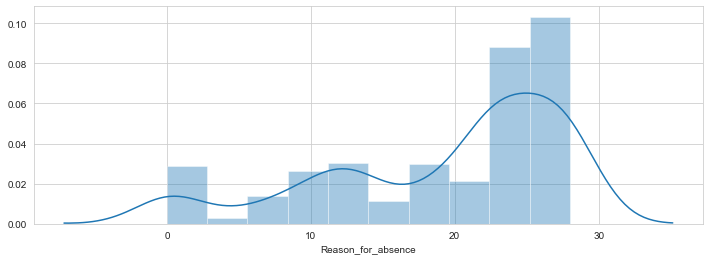

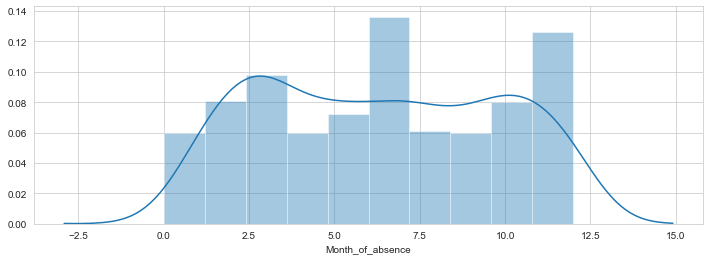

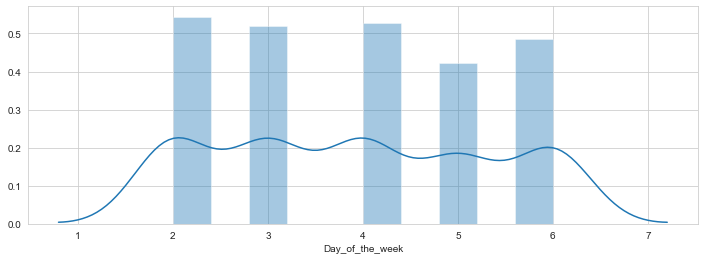

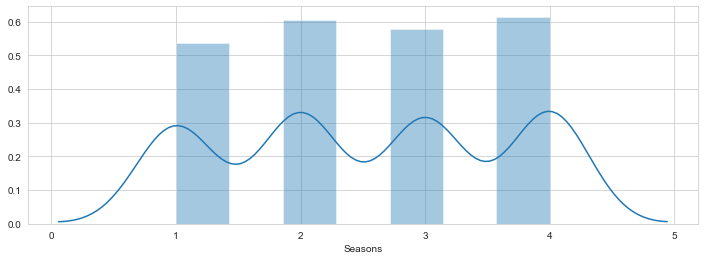

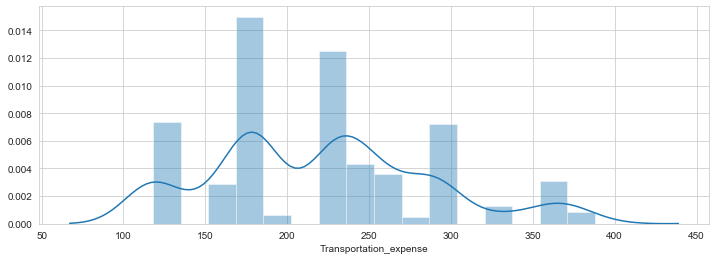

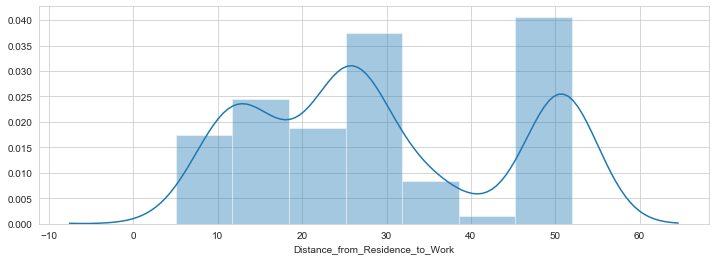

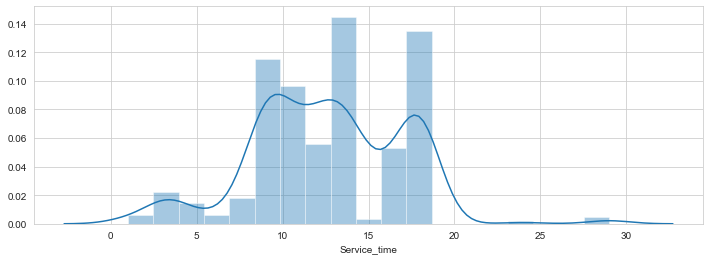

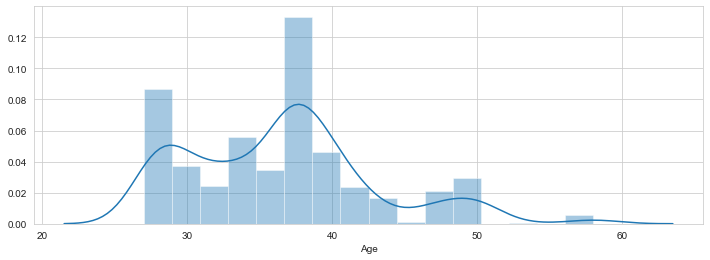

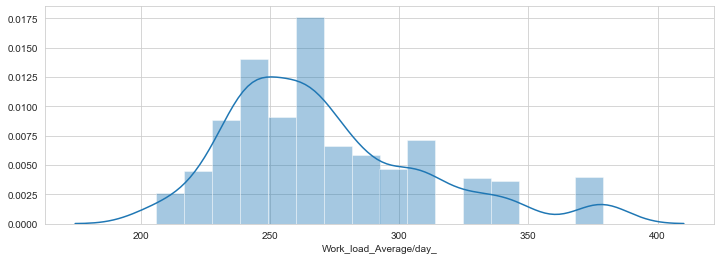

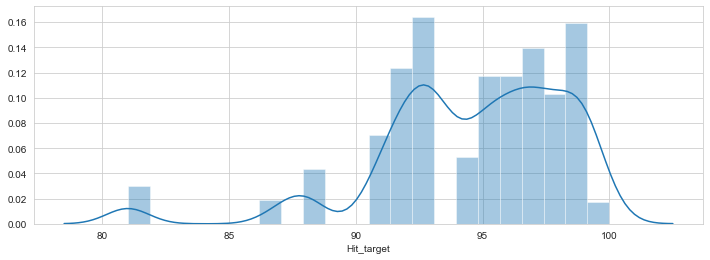

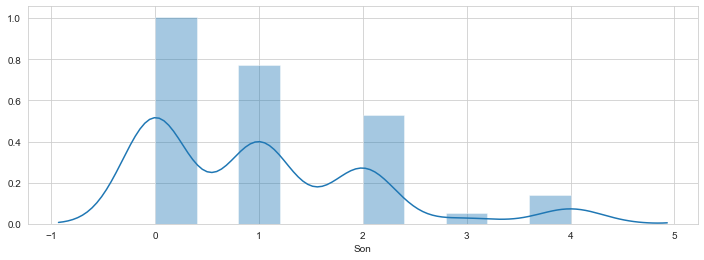

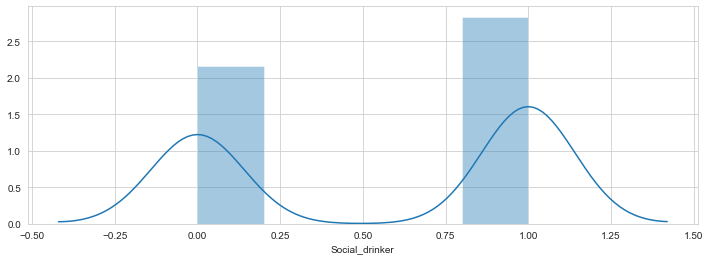

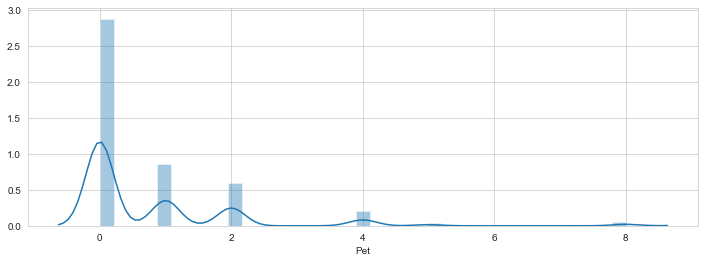

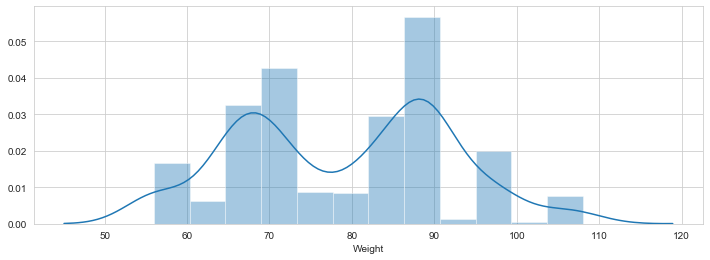

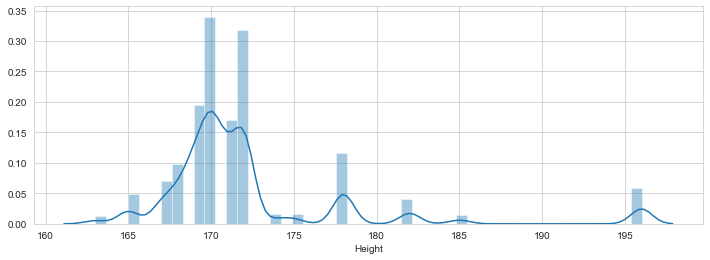

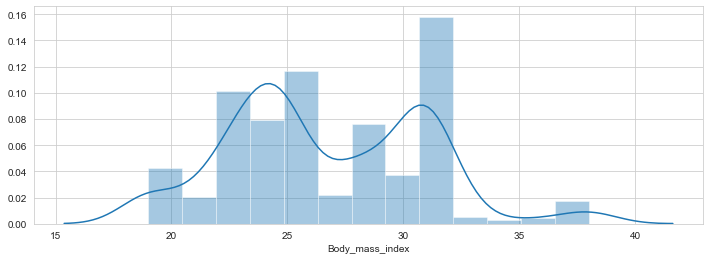

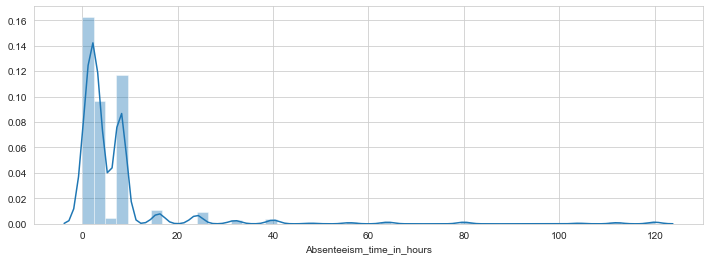

In [11]:
# Creating a list of columns having kde bandwidth more than  so that they can be visulaized.

abs_num = df_absent[['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target', 'Son', 'Social_drinker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours']]



# Visualizing the distribution of columns using distribution plot.

for i in abs_num.columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,4))
    x = sns.distplot(abs_num[i])
    plt.show()

The numeric variables are not at all normally distributed. So, later the skewness is to be treated.

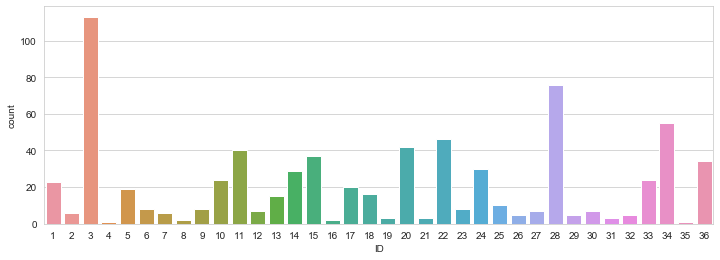

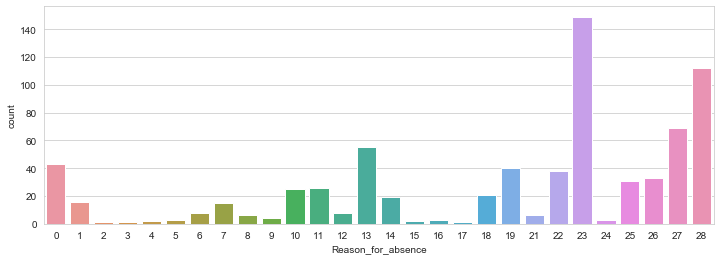

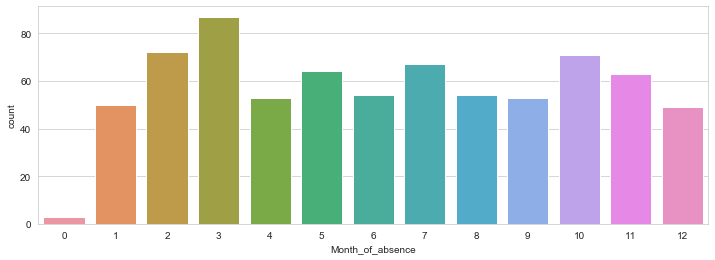

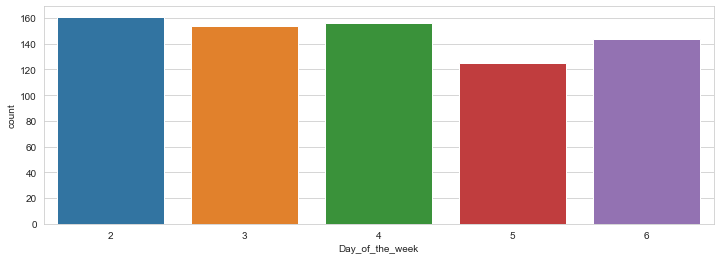

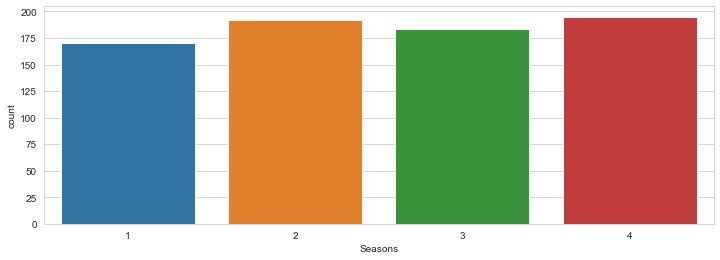

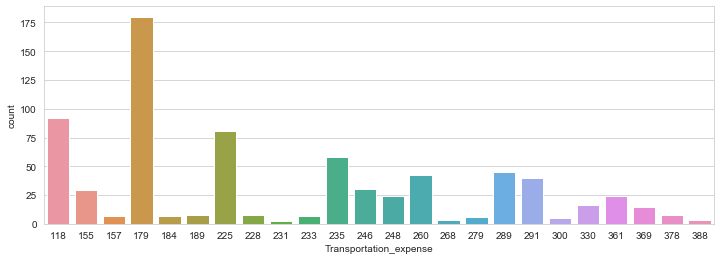

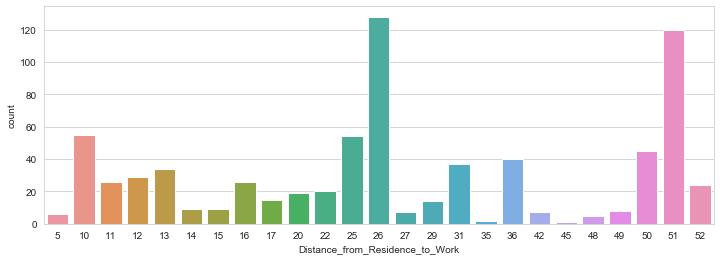

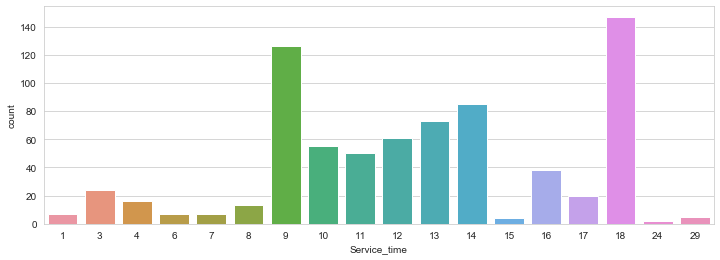

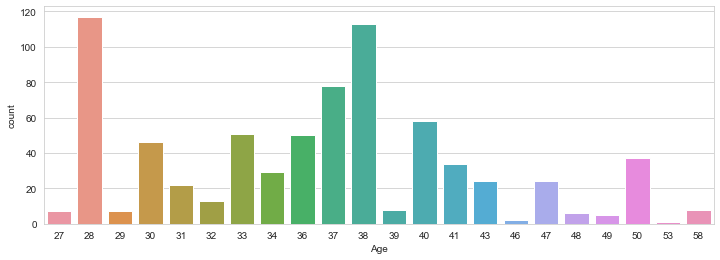

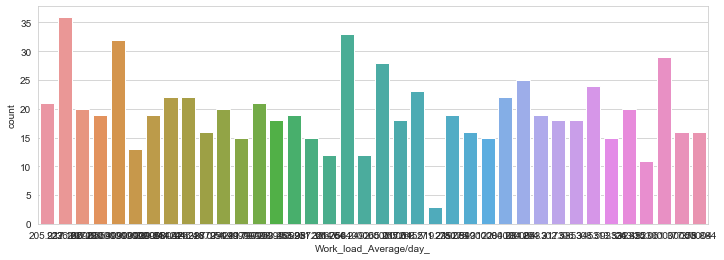

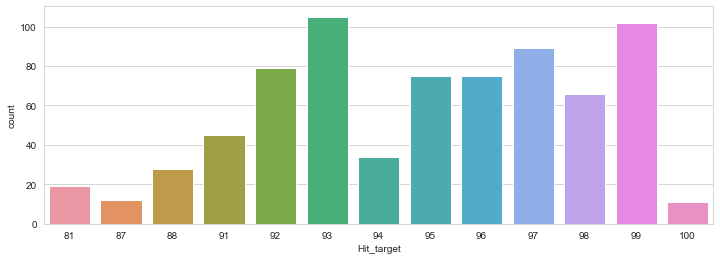

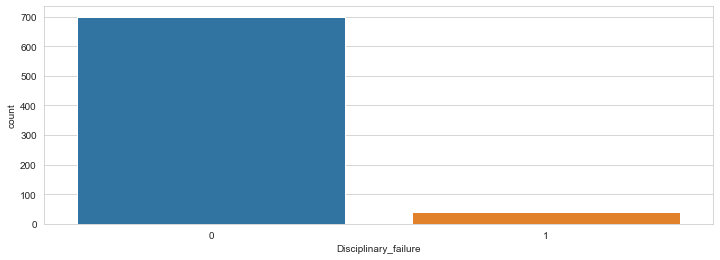

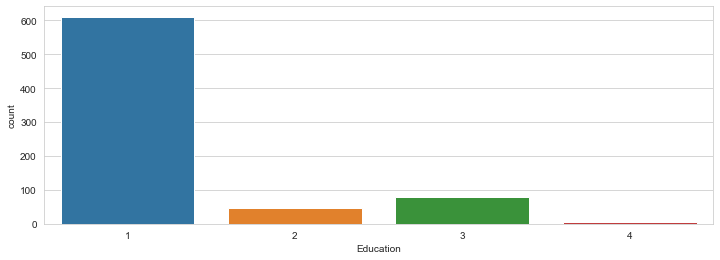

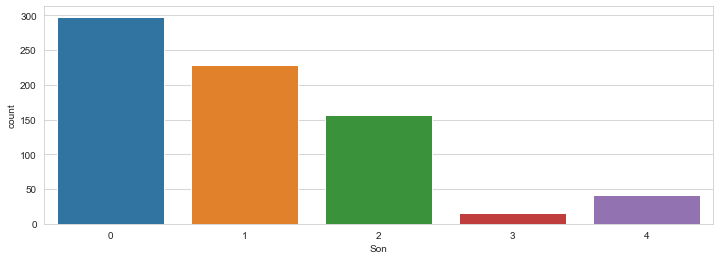

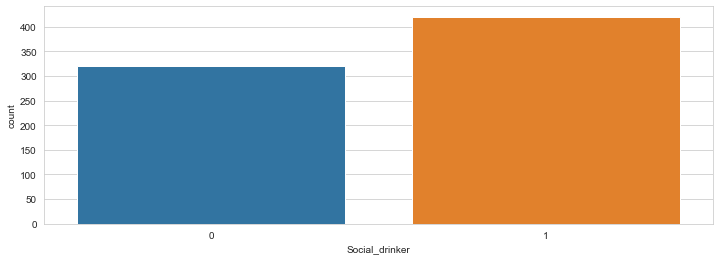

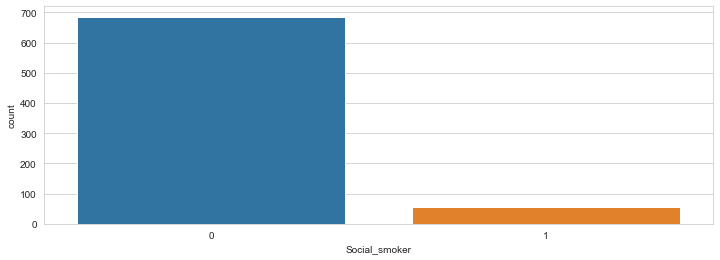

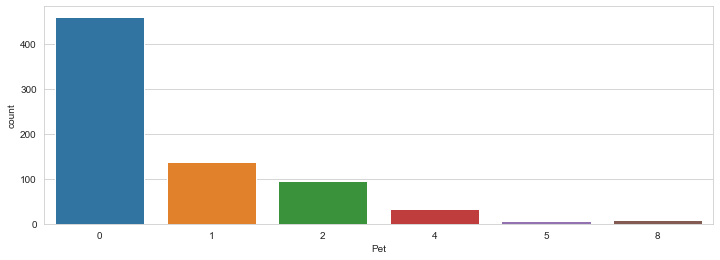

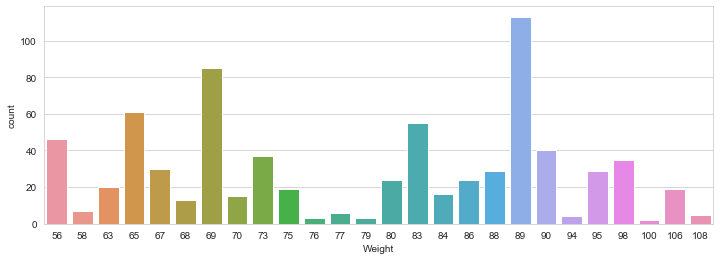

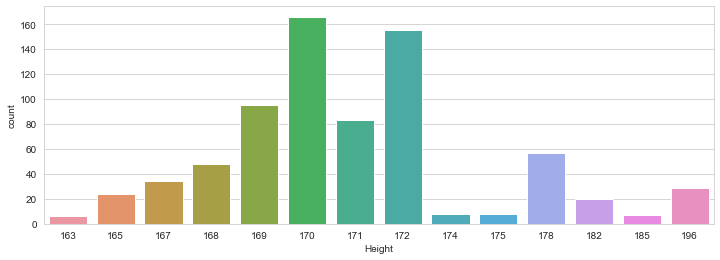

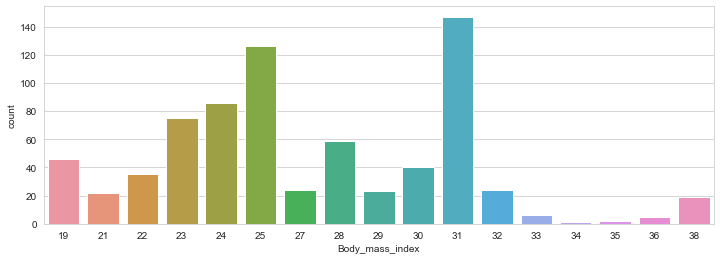

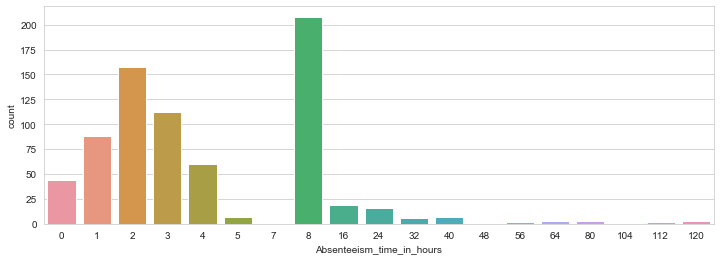

In [12]:
# Although the data is in numeric form but the columns are categorical in nature too.
# won't changing the datatype of the categorical nature columns but Visualizing the count of each column/feature.

for i in df_absent.columns:
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,4))
    x = sns.countplot(df_absent[i], data=df_absent)
    plt.show()

OBSERVATIONS :

1. The count of 4th month is more in the absence of employess at work.
2. When there is absence at work usually it was Monday followed by Wednesday.
3. The count of absence at work is more in spring season followed by autumn season.
4. Most of the employees distance to work from their respective residence is about 26 km.
5. Majority of the employees have given 18 hrs as their service time followed by 9 hrs.
6. The count of age 28 is more followed by the age 38 of the employees.
7. There is 30% of Disciplinary failure.
8. The maximum no. i.e. about 60% of employees have done highschool.
9. The Majority of the employess are not having a son.
10. The ratio of employees who are Social drinker is more and in opposite the ratio of employees being Social smoker is very less i.e. about 35%.
11. Majority of employees do not have nay pet.
12. The maximum no. employees are having a weight of 89.
13. The height ranges from 170 - 172 of the majority of the employees.
14. The maximum body mass index is 31.
15. the employees absence is maximum of 8 hrs followed by 2 hrs.

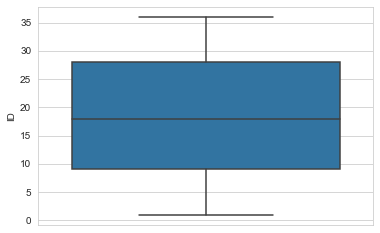

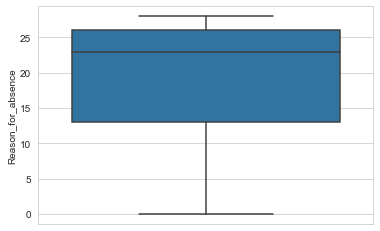

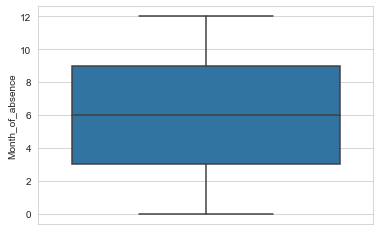

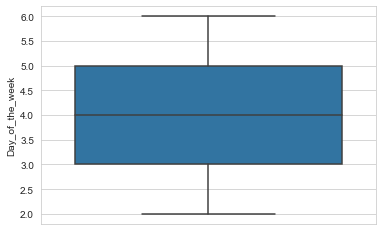

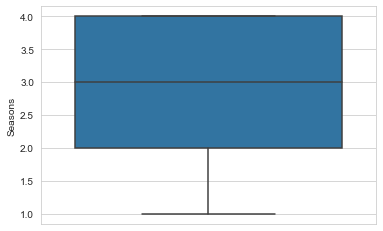

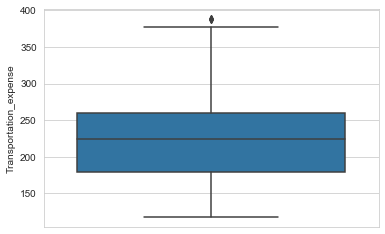

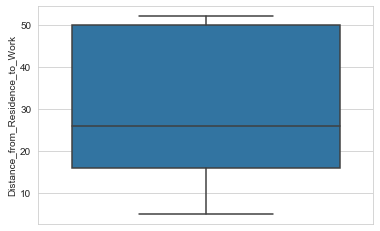

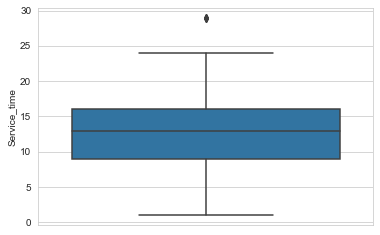

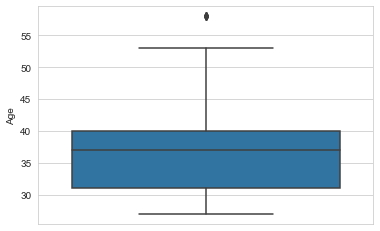

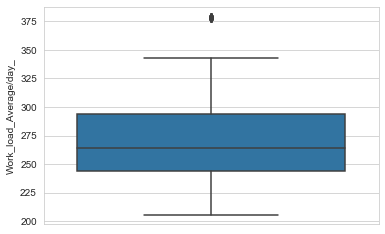

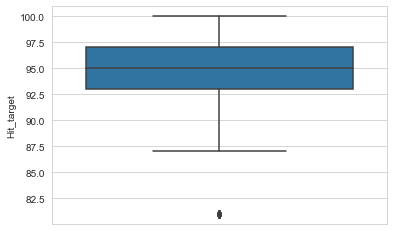

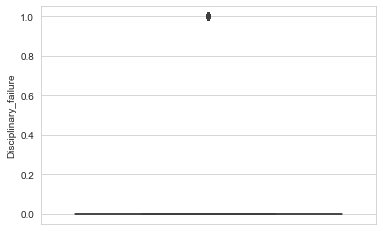

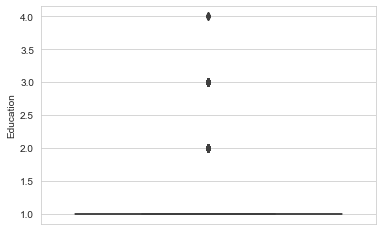

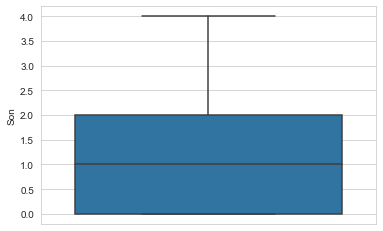

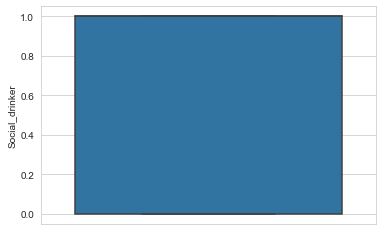

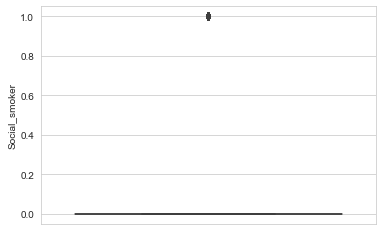

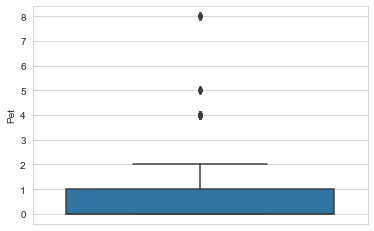

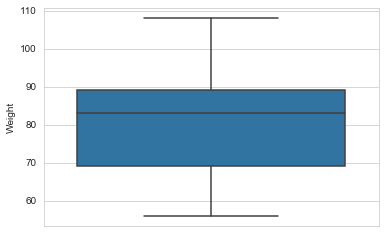

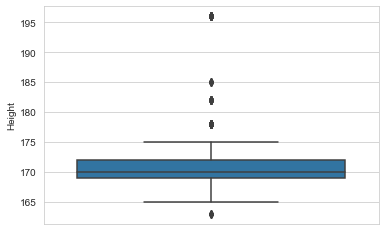

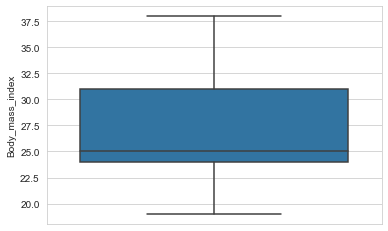

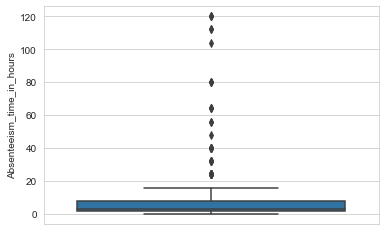

In [13]:
# Plotting the outliers.

for i in df_absent.columns:
    x = sns.boxplot(df_absent[i], data=df_absent, orient='v')
    plt.show()

##### BIVARIATE ANALYSIS

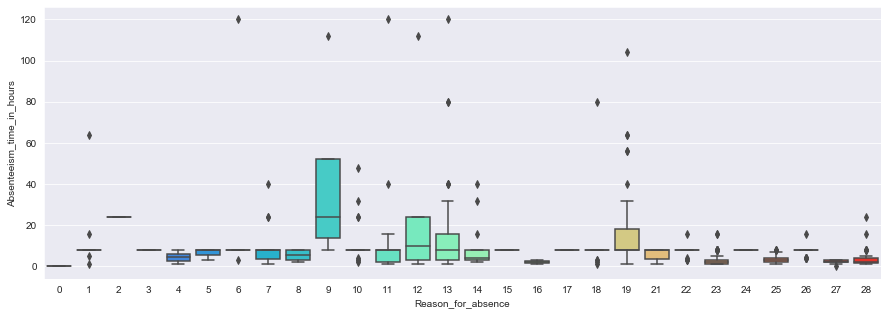

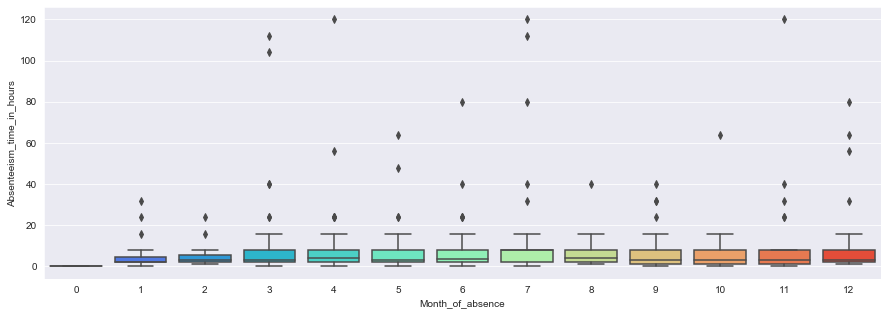

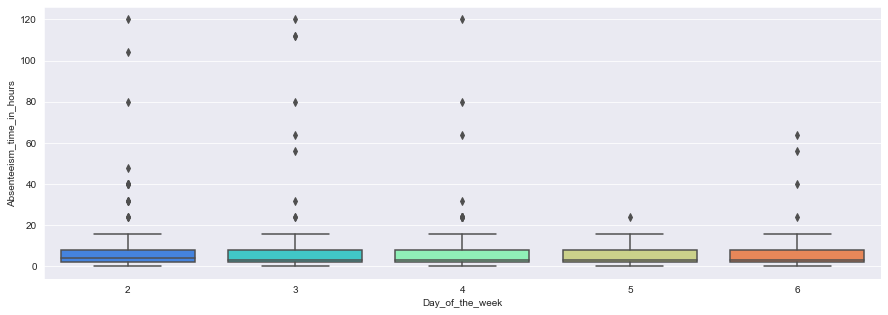

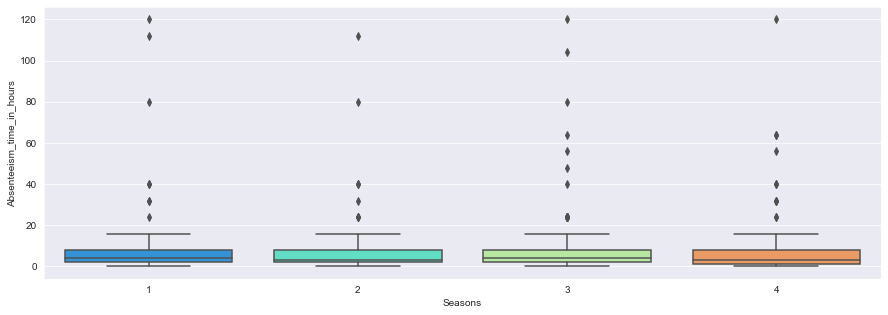

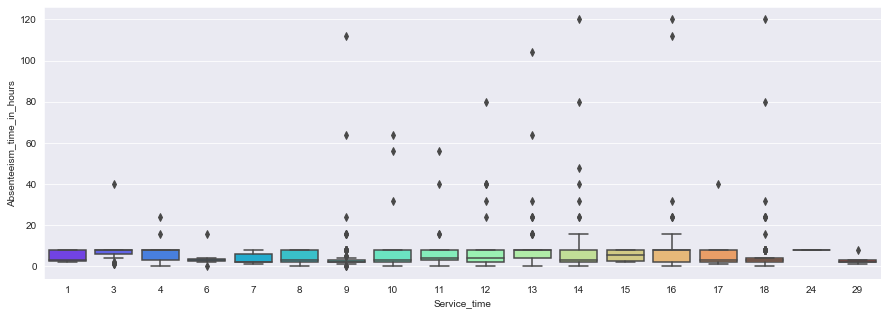

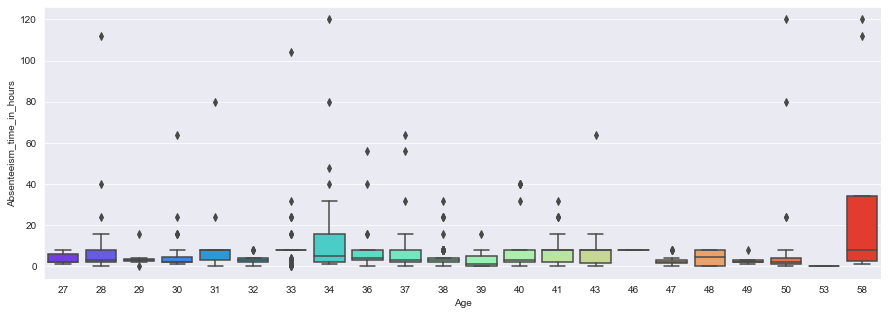

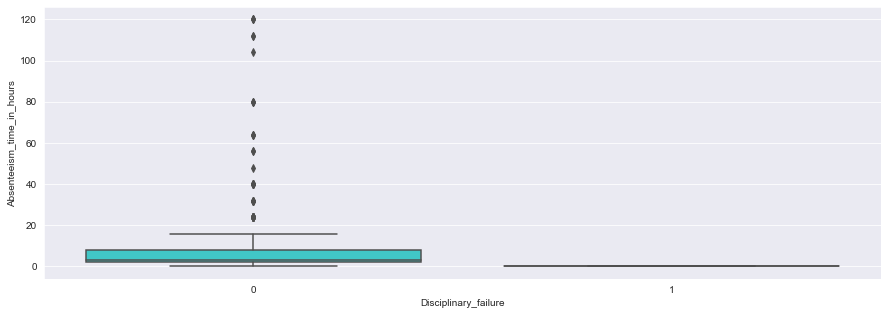

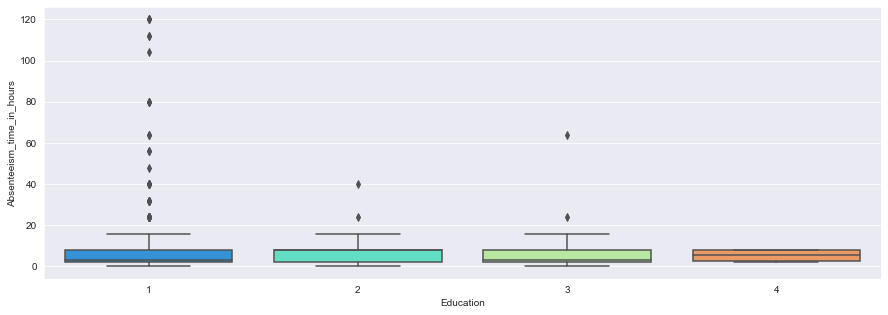

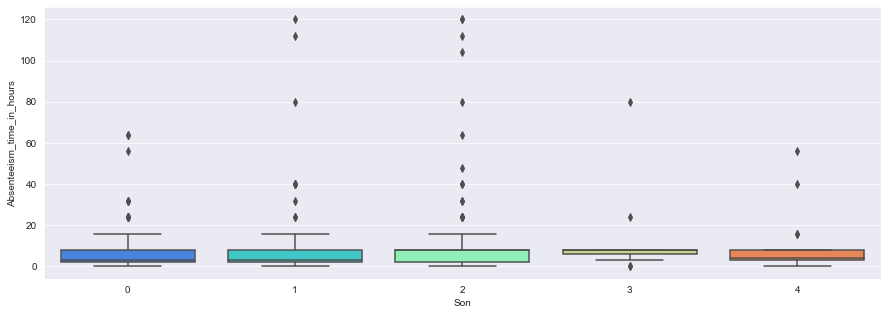

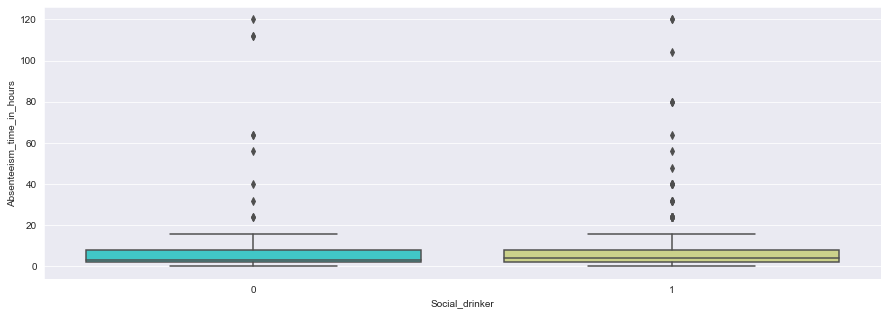

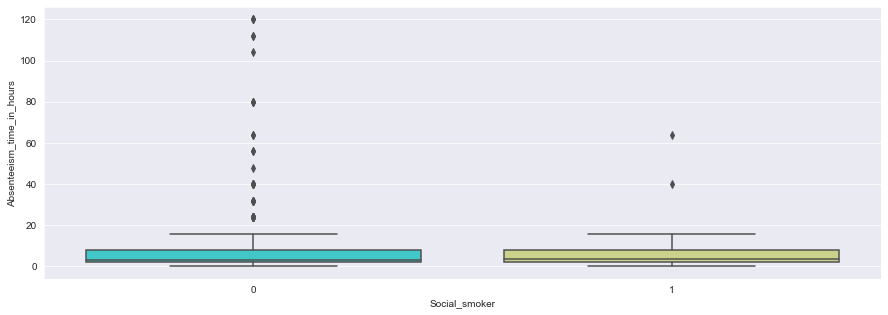

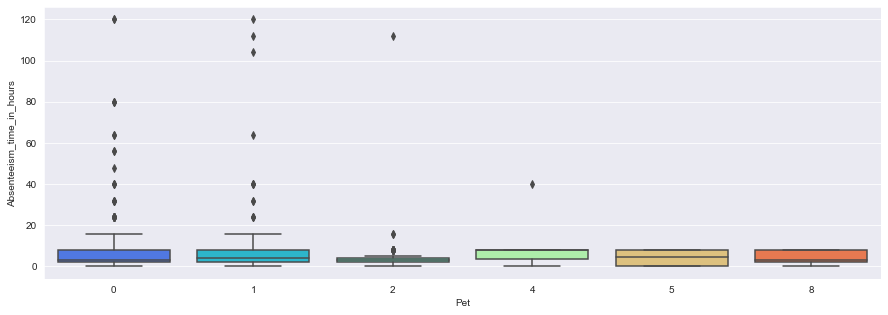

In [14]:
# Plotting the outliers of the attributes in realtion with the target variable.

abs_out = df_absent[['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Service_time', 'Age', 'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet']]

for i in abs_out.columns:
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,5))
    x = sns.boxplot(abs_out[i], df_absent['Absenteeism_time_in_hours'],palette='rainbow', data=df_absent)
    plt.show()

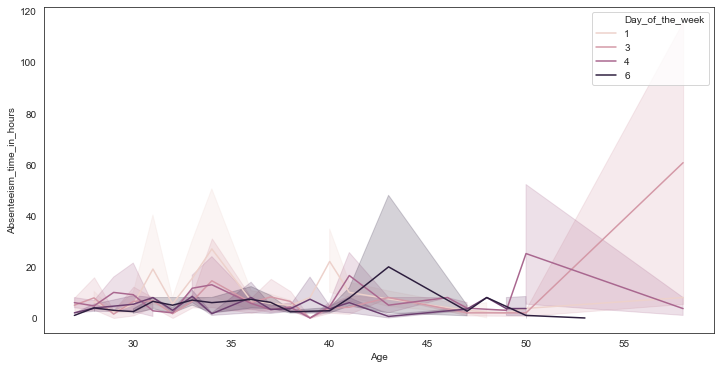

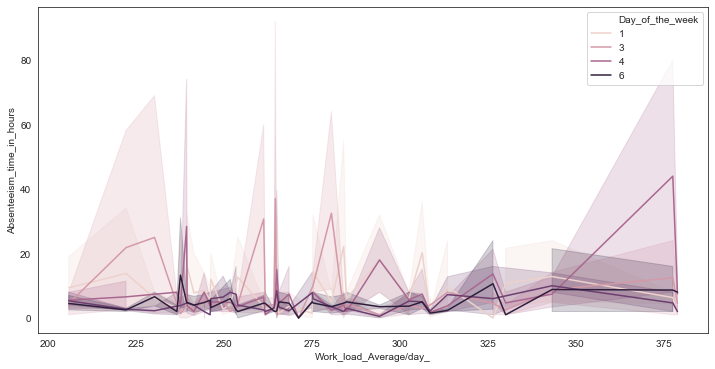

In [15]:
# Relationship of Absenteeism_time_in_hours with Age and Work_load_Average/day_ being hue = week day.

sns.set_style('white')
plt.figure(figsize=(12,6))
sns.lineplot(x='Age', y='Absenteeism_time_in_hours', data=df_absent, hue='Day_of_the_week')
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='Work_load_Average/day_', y='Absenteeism_time_in_hours',hue='Day_of_the_week', data=df_absent)
plt.show()

<Figure size 864x432 with 0 Axes>

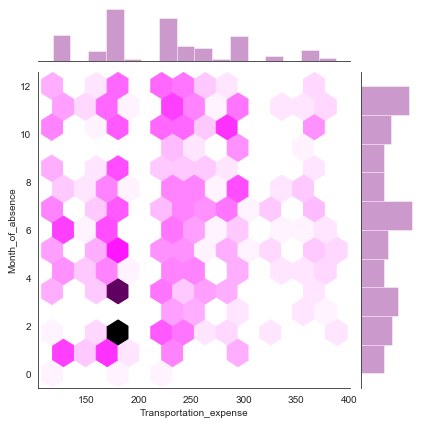

In [16]:
# Visualizing the jointplot displaying the relation b/w Transportation_expense and Month_of_absence.

plt.figure(figsize=(12,6))
sns.jointplot(x='Transportation_expense', y='Month_of_absence', data=df_absent, kind='hex', color='purple')

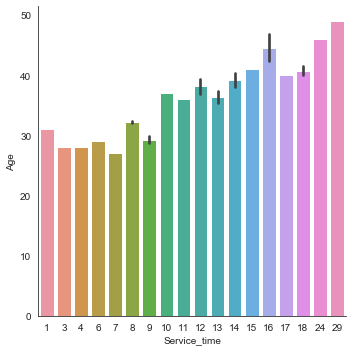

In [17]:
# The below plot expresses the service time given by the eployees of different age.

sns.factorplot(x="Service_time", y="Age", data=df_absent, kind='bar')

<Figure size 864x432 with 0 Axes>

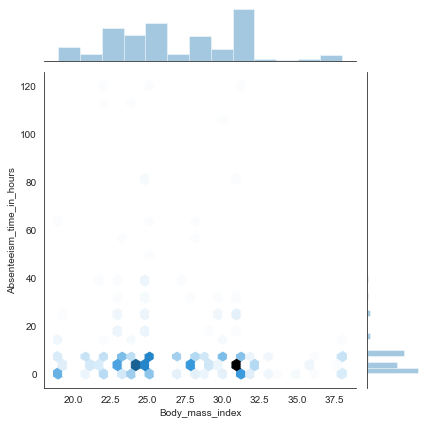

In [18]:
# Visualizing the jointplot displaying the relation b/w Body_mass_index and Absenteeism_time_in_hours.

plt.figure(figsize=(12,6))
sns.jointplot(x='Body_mass_index', y='Absenteeism_time_in_hours', data=df_absent, kind='hex')

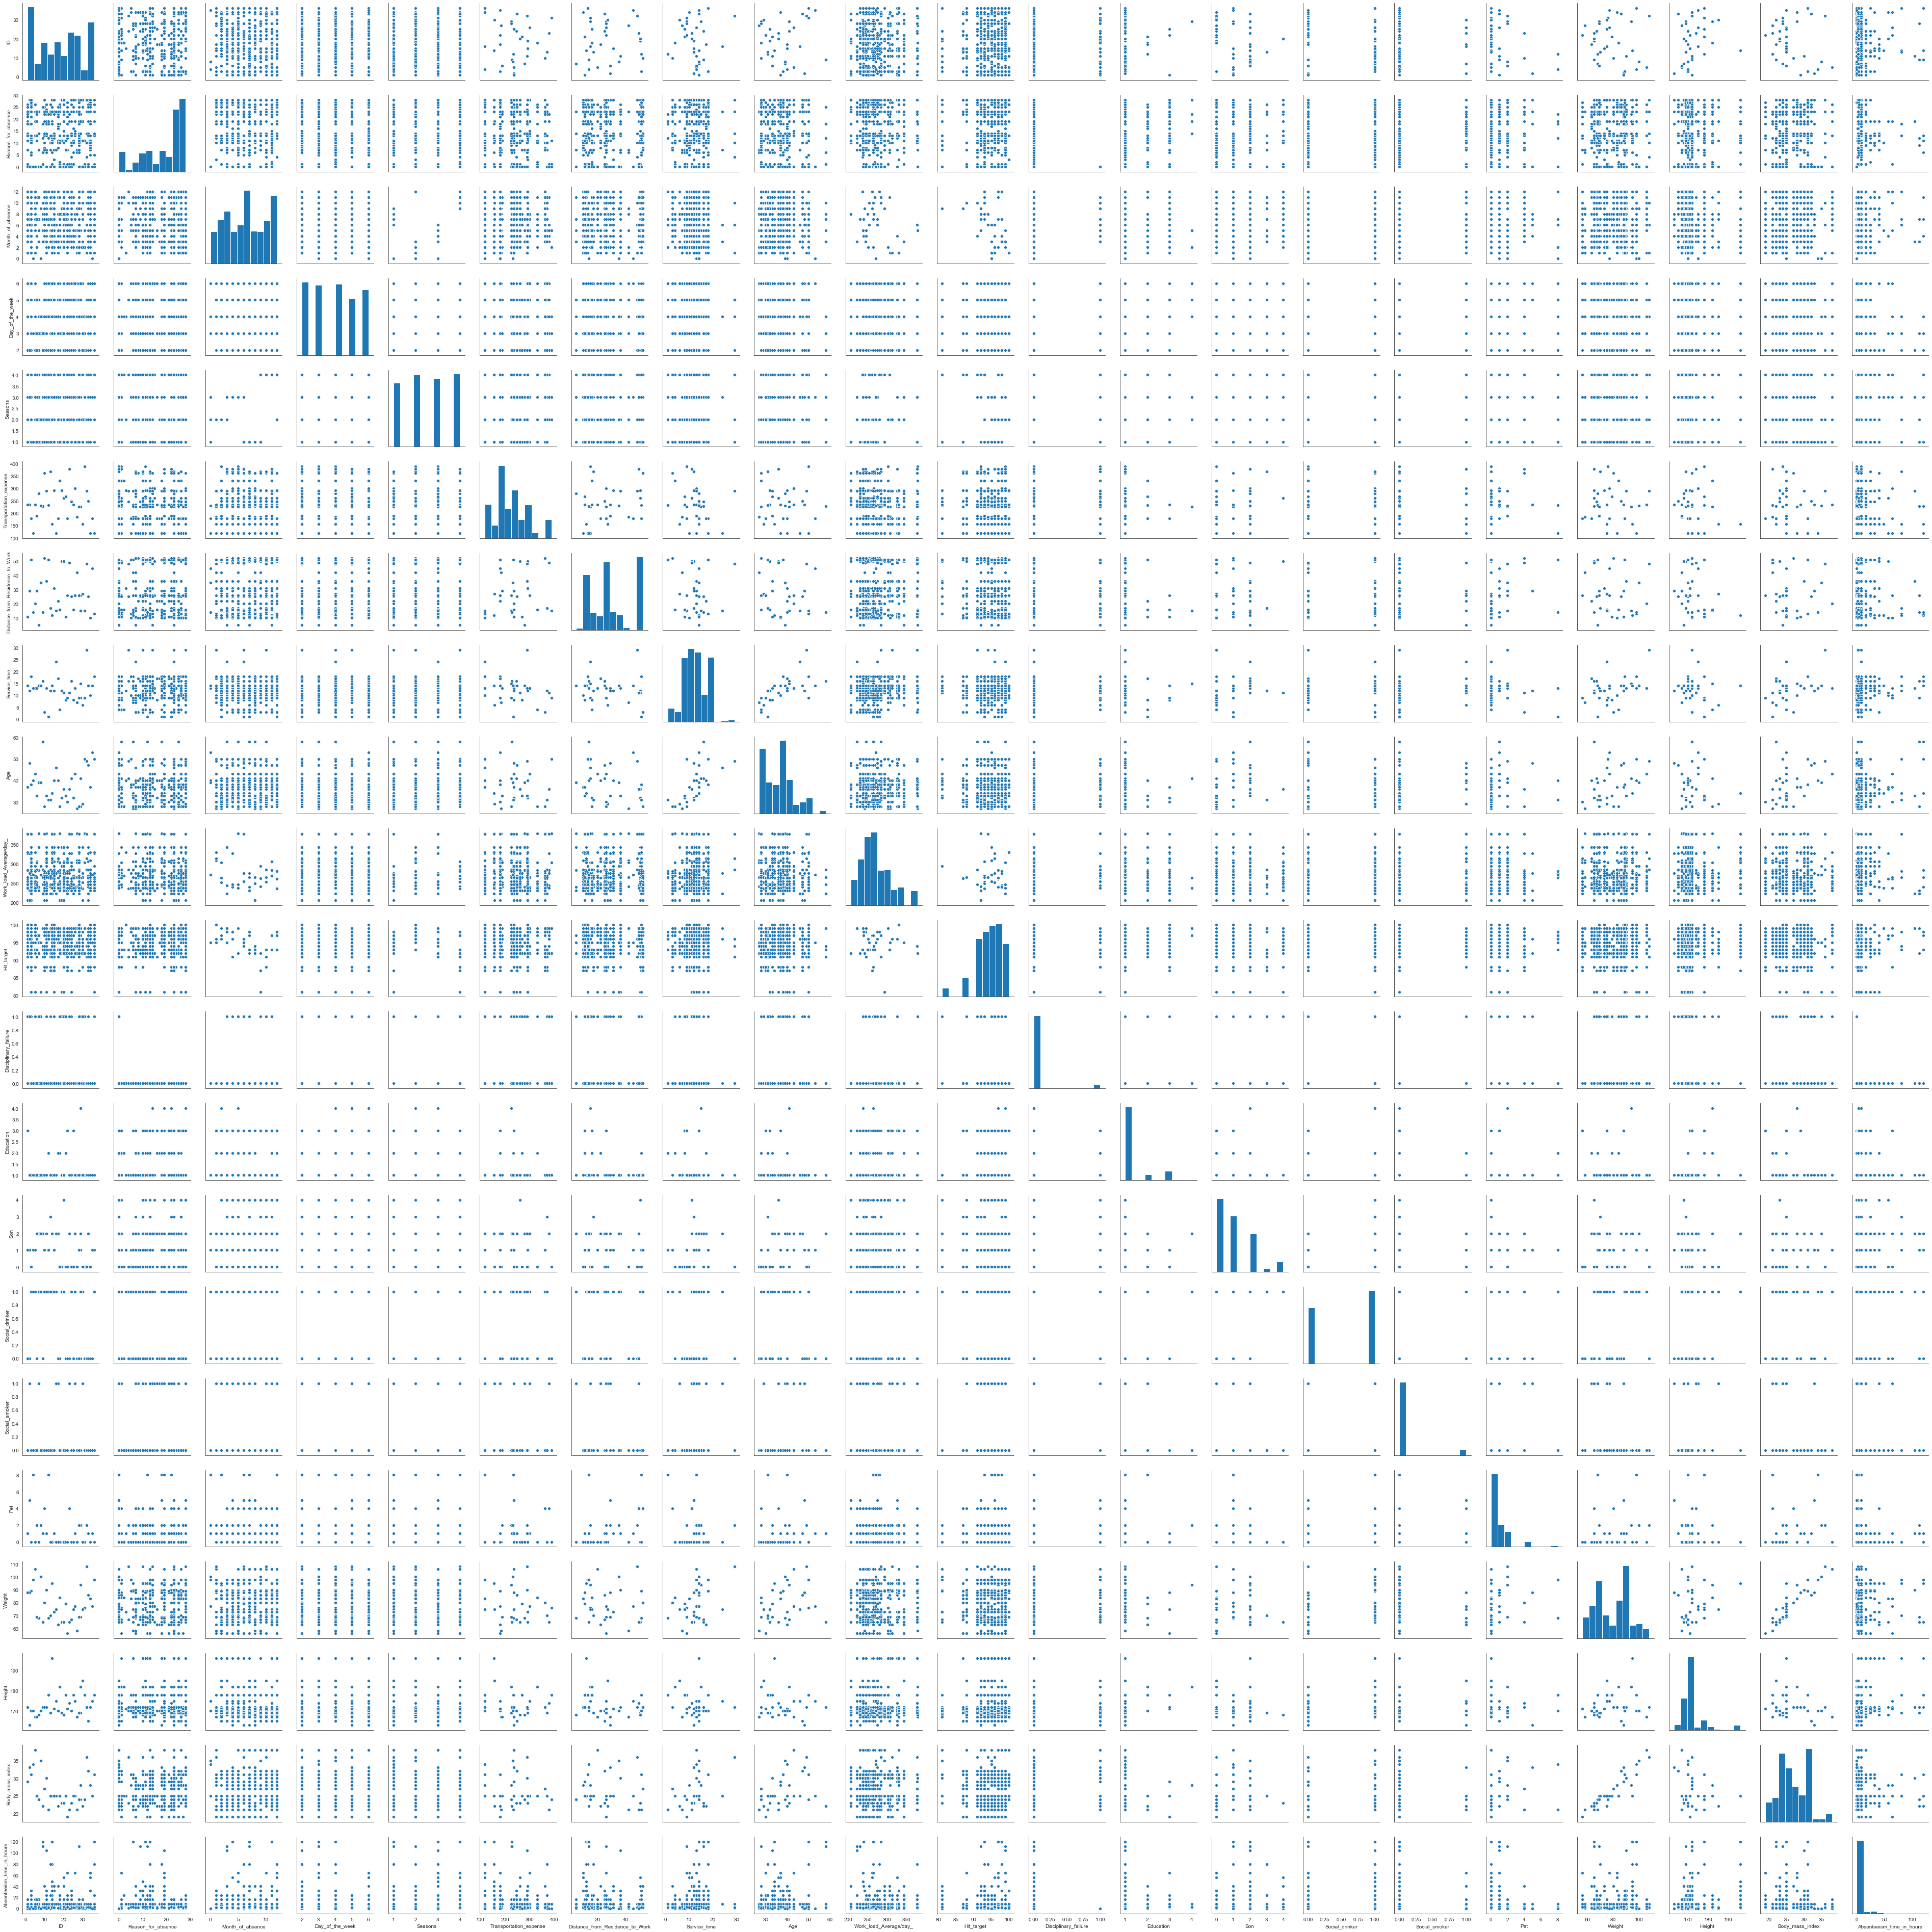

In [19]:
# Let's check the pairplot

sns.pairplot(df_absent)

In [20]:
# Let's drop the 'Weight' as it is strongly correlated with the 'Body_mass_index'.

df_absent = df_absent.drop(['Weight'], axis=1)
df_absent.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

#### SKEWNESS AND OUTLIERS

In [21]:
# Let's check the skewness of the data.

df_absent.skew()

ID                                 0.016606
Reason_for_absence                -0.915312
Month_of_absence                   0.069369
Day_of_the_week                    0.102440
Seasons                           -0.038532
Transportation_expense             0.396189
Distance_from_Residence_to_Work    0.312083
Service_time                      -0.004720
Age                                0.697703
Work_load_Average/day_             0.961457
Hit_target                        -1.261708
Disciplinary_failure               3.952270
Education                          2.108953
Son                                1.086465
Social_drinker                    -0.273327
Social_smoker                      3.290333
Pet                                2.735715
Height                             2.566060
Body_mass_index                    0.305046
Absenteeism_time_in_hours          5.720728
dtype: float64

In [22]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_absent))
print(z.shape)

# Removing the outliers.

df_absent = df_absent.loc[(z<3).all(axis=1)]
print(df_absent.shape)

(740, 20)
(576, 20)


164 rows have been removed as the outliers.

In [23]:
# Let's check the skewness after removing the outliers.

df_absent.skew()

ID                                -0.058065
Reason_for_absence                -1.027334
Month_of_absence                   0.109690
Day_of_the_week                    0.082048
Seasons                           -0.019301
Transportation_expense             0.327717
Distance_from_Residence_to_Work    0.199294
Service_time                      -0.153111
Age                                0.517042
Work_load_Average/day_             1.019484
Hit_target                        -0.461369
Disciplinary_failure               0.000000
Education                          1.990046
Son                                1.447470
Social_drinker                    -0.188822
Social_smoker                      0.000000
Pet                                1.721238
Height                             1.449688
Body_mass_index                    0.037118
Absenteeism_time_in_hours          3.171312
dtype: float64

As the outliers are removed, this also effected the reduction in the skewness of the dataset.

In [24]:
# Treating the skewness with sqrt function.

for col in df_absent.columns:
    if df_absent.skew().loc[col]>0.55:
        df_absent[col]=np.sqrt(df_absent[col])

In [25]:
# Again checking the skewness after treament.

df_absent.skew()

ID                                -0.058065
Reason_for_absence                -1.027334
Month_of_absence                   0.109690
Day_of_the_week                    0.082048
Seasons                           -0.019301
Transportation_expense             0.327717
Distance_from_Residence_to_Work    0.199294
Service_time                      -0.153111
Age                                0.517042
Work_load_Average/day_             0.844140
Hit_target                        -0.461369
Disciplinary_failure               0.000000
Education                          1.959022
Son                                0.360208
Social_drinker                    -0.188822
Social_smoker                      0.000000
Pet                                0.813730
Height                             1.408211
Body_mass_index                    0.037118
Absenteeism_time_in_hours          1.438259
dtype: float64

The skewness have been reduced or treated to it's most possible extent.

In [26]:
# Let's again check the data types of the attributes after handling the skewness and outliers.

df_absent.dtypes

ID                                   int64
Reason_for_absence                   int64
Month_of_absence                     int64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense               int64
Distance_from_Residence_to_Work      int64
Service_time                         int64
Age                                  int64
Work_load_Average/day_             float64
Hit_target                           int64
Disciplinary_failure                 int64
Education                          float64
Son                                float64
Social_drinker                       int64
Social_smoker                        int64
Pet                                float64
Height                             float64
Body_mass_index                      int64
Absenteeism_time_in_hours          float64
dtype: object

After removing the outliers and reducingr the skewness of the data, the target variable along with 4 other attributes have now 'float64' as a datatype, rest remaing the same i.e. type 'int64'.

#### SEPERATING THE INPUT AND OUTPUT VARIABLES

In [27]:
# Let's Separate the input and target variables

X = df_absent.drop(columns=["Absenteeism_time_in_hours"])
y = df_absent[["Absenteeism_time_in_hours"]]

In [28]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(576, 19)
(576, 1)


In [29]:
# Let's check the head of the input variables.
X.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Height,Body_mass_index
0,11,26,7,3,1,289,36,13,33,15.477532,97,0,1.0,1.414214,1,0,1.0,13.114877,30
2,3,23,7,4,1,179,51,18,38,15.477532,97,0,1.0,0.000000,1,0,0.0,13.038405,31
4,11,23,7,5,1,289,36,13,33,15.477532,97,0,1.0,1.414214,1,0,1.0,13.114877,30
5,3,23,7,6,1,179,51,18,38,15.477532,97,0,1.0,0.000000,1,0,0.0,13.038405,31
6,10,22,7,6,1,361,52,3,28,15.477532,97,0,1.0,1.000000,1,0,2.0,13.114877,27


In [30]:
# Let's check the head of the output variables.
y.head()

,Absenteeism_time_in_hours
0,2.000000
2,1.414214
4,1.414214
5,1.414214
6,2.828427


##### SCALING THE INPUT VARIABLES

In [31]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.63135694,  0.72490314,  0.20742767, ...,  0.79970574,
         0.37848306,  0.74242082],
       [-1.33003436,  0.30526072,  0.20742767, ..., -0.74800638,
        -0.25376988,  0.9827999 ],
       [-0.63135694,  0.30526072,  0.20742767, ...,  0.79970574,
         0.37848306,  0.74242082],
       ...,
       [-1.50470371, -1.37330896,  0.20742767, ...,  0.79970574,
         0.37848306,  0.50204173],
       [-0.89336097, -2.91199784, -1.78387794, ...,  1.44078909,
        -0.25376988,  1.94431623],
       [ 1.46467532, -2.91199784, -1.78387794, ...,  0.79970574,
         1.32000975, -0.4594746 ]])

#### Training and Testing different algorithms

In [32]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model

In [33]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, pred)))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [34]:
# Creating the instances for the algorithms.

lr = LinearRegression()
lreg = Lasso(alpha=0.0001)
rg = Ridge(alpha=0.0001)
sv = SVR()
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()

In [35]:
models = []
models.append(('LinearRegression', lr))
models.append(('Lasso', lreg))
models.append(('Ridge', rg))
models.append(('SVR', sv))
models.append(('DecisionTreeRegressor', dtr))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))

In [36]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.36255332286522335 achieved at 84


Mean Absolute Error :  0.7898811295868986


RMSE :  0.9117723744573554


Cross validation score (Mean r2 score): 0.13490210057793459
Standard Deviationin r2 score : 0.09394783290426674




-------- Lasso --------
Maximum r2 score : 0.3624370122361956 achieved at 84


Mean Absolute Error :  0.789928487429718


RMSE :  0.9118356571318441


Cross validation score (Mean r2 score): 0.13507944646944578
Standard Deviationin r2 score : 0.09400093894150764




-------- Ridge --------
Maximum r2 score : 0.3625532784197044 achieved at 84


Mean Absolute Error :  0.789881142726525


RMSE :  0.9117723787215943


Cross validation score (Mean r2 score): 0.13490220554647486
Standard Deviationin r2 score : 0.09394779774065336




-------- SVR --------
Maximum r2 score : 0.38938205799146053 achieved at 84


Mean Absolute Error :  0.7940461365134888


RMSE :  0.9421470948287106


Cross validation score (Mean r2 sco

RandomForestRegressor is giving the best score among all the algorithms tested. 

In [37]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rfr, 'absenteesim.pkl')

['absenteesim.pkl']